In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# List all the csv files in the folder

csv_files = [x for x in os.listdir('errors') if x.endswith('.csv')]
csv_files

['CO2_PB.csv',
 'CO2_WM.csv',
 'NO2_PB.csv',
 'NO2_WM.csv',
 'NO_PB.csv',
 'NO_WM.csv']

In [3]:
## combine all csv files by column

csv_list=[]
for i in range(0, len(csv_files)):
    csv=pd.read_csv('errors/'+csv_files[i])
    csv_list.append(csv)

In [4]:
df = pd.concat(csv_list, axis=1)
df

Test RMSE: CO$_2$ (ppm) (ASA)  Test R$^2$: CO$_2$ (ASA)  \
0                        8.471142                      0.99   
1                       13.666611                      0.99   
2                       13.833297                      0.99   
3                       11.148065                      0.99   
4                       10.594418                      0.99   
..                            ...                       ...   
95                      12.394670                      0.99   
96                       7.480448                      0.99   
97                       6.232920                      0.99   
98                      10.065124                      0.99   
99                       5.077763                      0.99   

    Test RMSE: CO$_2$ (ppm) (WM)  Test R$^2$: CO$_2$ (WM)  \
0                      17.887367                     0.98   
1                      15.568194                     0.99   
2                      22.205251                     0.98   
3                      13.400543                     0.99   
4                      13.098523                     0.99   
..                           ...                      ...   
95                     16.374748                     0.98   
96                     13.458957                     0.99   
97                     14.978612                     0.99   
98                     15.641297                     0.99   
99                     16.752121                     0.98   

    Test RMSE: NO$_2$ (ppb) (ASA)  Test R$^2$: NO$_2$ (ASA)  \
0                        5.905076                      0.49   
1                        6.335014                      0.21   
2                        6.737853                      0.29   
3                        9.201765                      0.16   
4                        7.196939                      0.23   
..                            ...                       ...   
95                       4.719815                      0.52   
96                       6.867473                      0.29   
97                       5.019463                      0.41   
98                       5.986557                      0.44   
99                      10.095727                      0.22   

    Test RMSE: NO$_2$ (ppb) (WM)  Test R$^2$: NO$_2$ (WM)  \
0                       9.093189                     0.26   
1                       7.661591                     0.30   
2                       8.599443                     0.25   
3                       6.206549                     0.26   
4                       7.922244                     0.23   
..                           ...                      ...   
95                      6.546640                     0.27   
96                      5.644812                     0.51   
97                      6.769242                     0.21   
98                      5.161040                     0.60   
99                      9.602828                     0.16   

    Test RMSE: NO (ppb) (ASA)  Test R$^2$: NO (ASA)  Test RMSE: NO (ppb) (WM)  \
0                   13.271387                  0.35                 12.049109   
1                    8.331237                  0.44                  8.745590   
2                   13.717518                  0.23                 10.420547   
3                    9.940462                  0.46                 10.594200   
4                   12.674868                  0.27                 11.886489   
..                        ...                   ...                       ...   
95                  11.333054                  0.36                  7.857190   
96                  12.969221                  0.39                 10.091708   
97                   7.796776                  0.48                 12.641092   
98                   9.513802                  0.46                 10.844848   
99                   9.724680                  0.42                  8.005558   

    Test R$^2$: NO (WM)   
0                   0.36

In [5]:
CO2_ASA_mean_rmse=df.loc[:, 'Test RMSE: CO$_2$ (ppm) (ASA)'].mean()
CO2_WM_mean_rmse=df.loc[:, 'Test RMSE: CO$_2$ (ppm) (WM)'].mean()

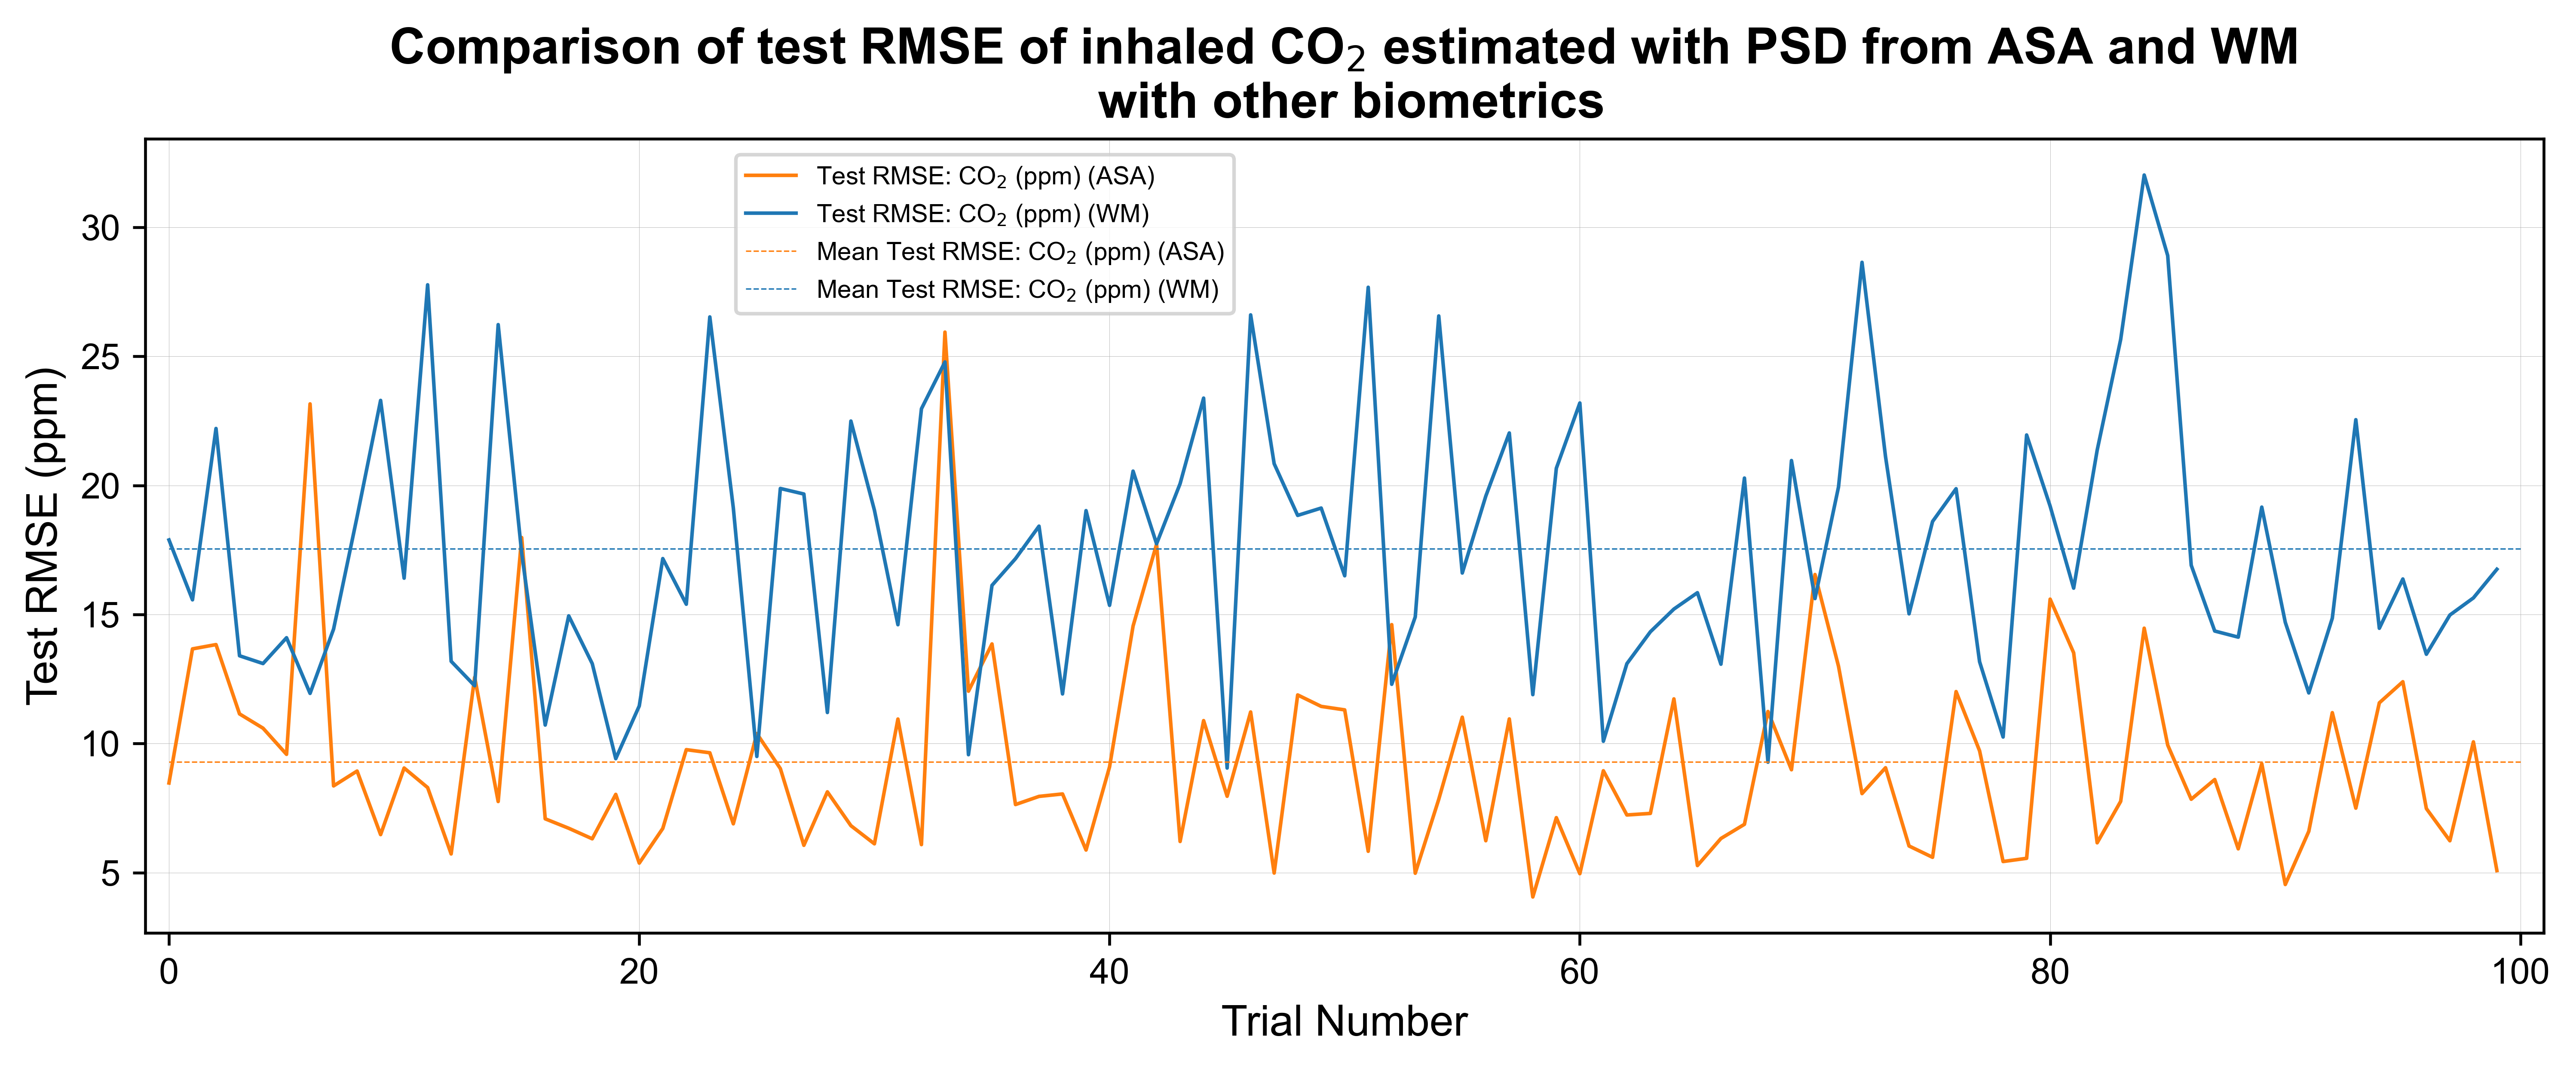

In [6]:
## Plot test RMSE of CO2 from ASA and WM

mpl.rcParams['figure.dpi'] = 600 ## change dpi
plt.rcParams['font.family'] = 'Arial' 

fig, ax = plt.subplots(figsize=(12,4))

ax.plot(df['Test RMSE: CO$_2$ (ppm) (ASA)'],label='Test RMSE: CO$_2$ (ppm) (ASA)',linewidth=1,color='tab:orange')
ax.plot(df['Test RMSE: CO$_2$ (ppm) (WM)'],label='Test RMSE: CO$_2$ (ppm) (WM)',linewidth=1,color='tab:blue')

ax.hlines(y=CO2_ASA_mean_rmse, color='tab:orange', linestyle='--', label='Mean Test RMSE: CO$_2$ (ppm) (ASA)',
                                                                            xmin=0, xmax=100, linewidth=0.4)
ax.hlines(y=CO2_WM_mean_rmse, color='tab:blue', linestyle='--', label='Mean Test RMSE: CO$_2$ (ppm) (WM)',
                                                                             xmin=0, xmax=100, linewidth=0.4)

ax.set_xlim([-1, 101])
plt.xlabel('Trial Number', fontsize=12)
plt.ylabel('Test RMSE (ppm)',fontsize=12)
plt.title('Comparison of test RMSE of inhaled CO$_2$ estimated with PSD from ASA and WM \n with other biometrics',
                                                                        fontsize=14,fontweight='bold')
plt.legend(fontsize=7, loc='center',  bbox_to_anchor=(0.35,0.88))
plt.grid(axis='both',linewidth=0.1)
plt.show()

In [7]:
NO2_ASA_mean_rmse=df.loc[:, 'Test RMSE: NO$_2$ (ppb) (ASA)'].mean()
NO2_WM_mean_rmse=df.loc[:, 'Test RMSE: NO$_2$ (ppb) (WM)'].mean()
NO_ASA_mean_rmse=df.loc[:, 'Test RMSE: NO (ppb) (ASA)'].mean()
NO_WM_mean_rmse=df.loc[:, 'Test RMSE: NO (ppb) (WM)'].mean()

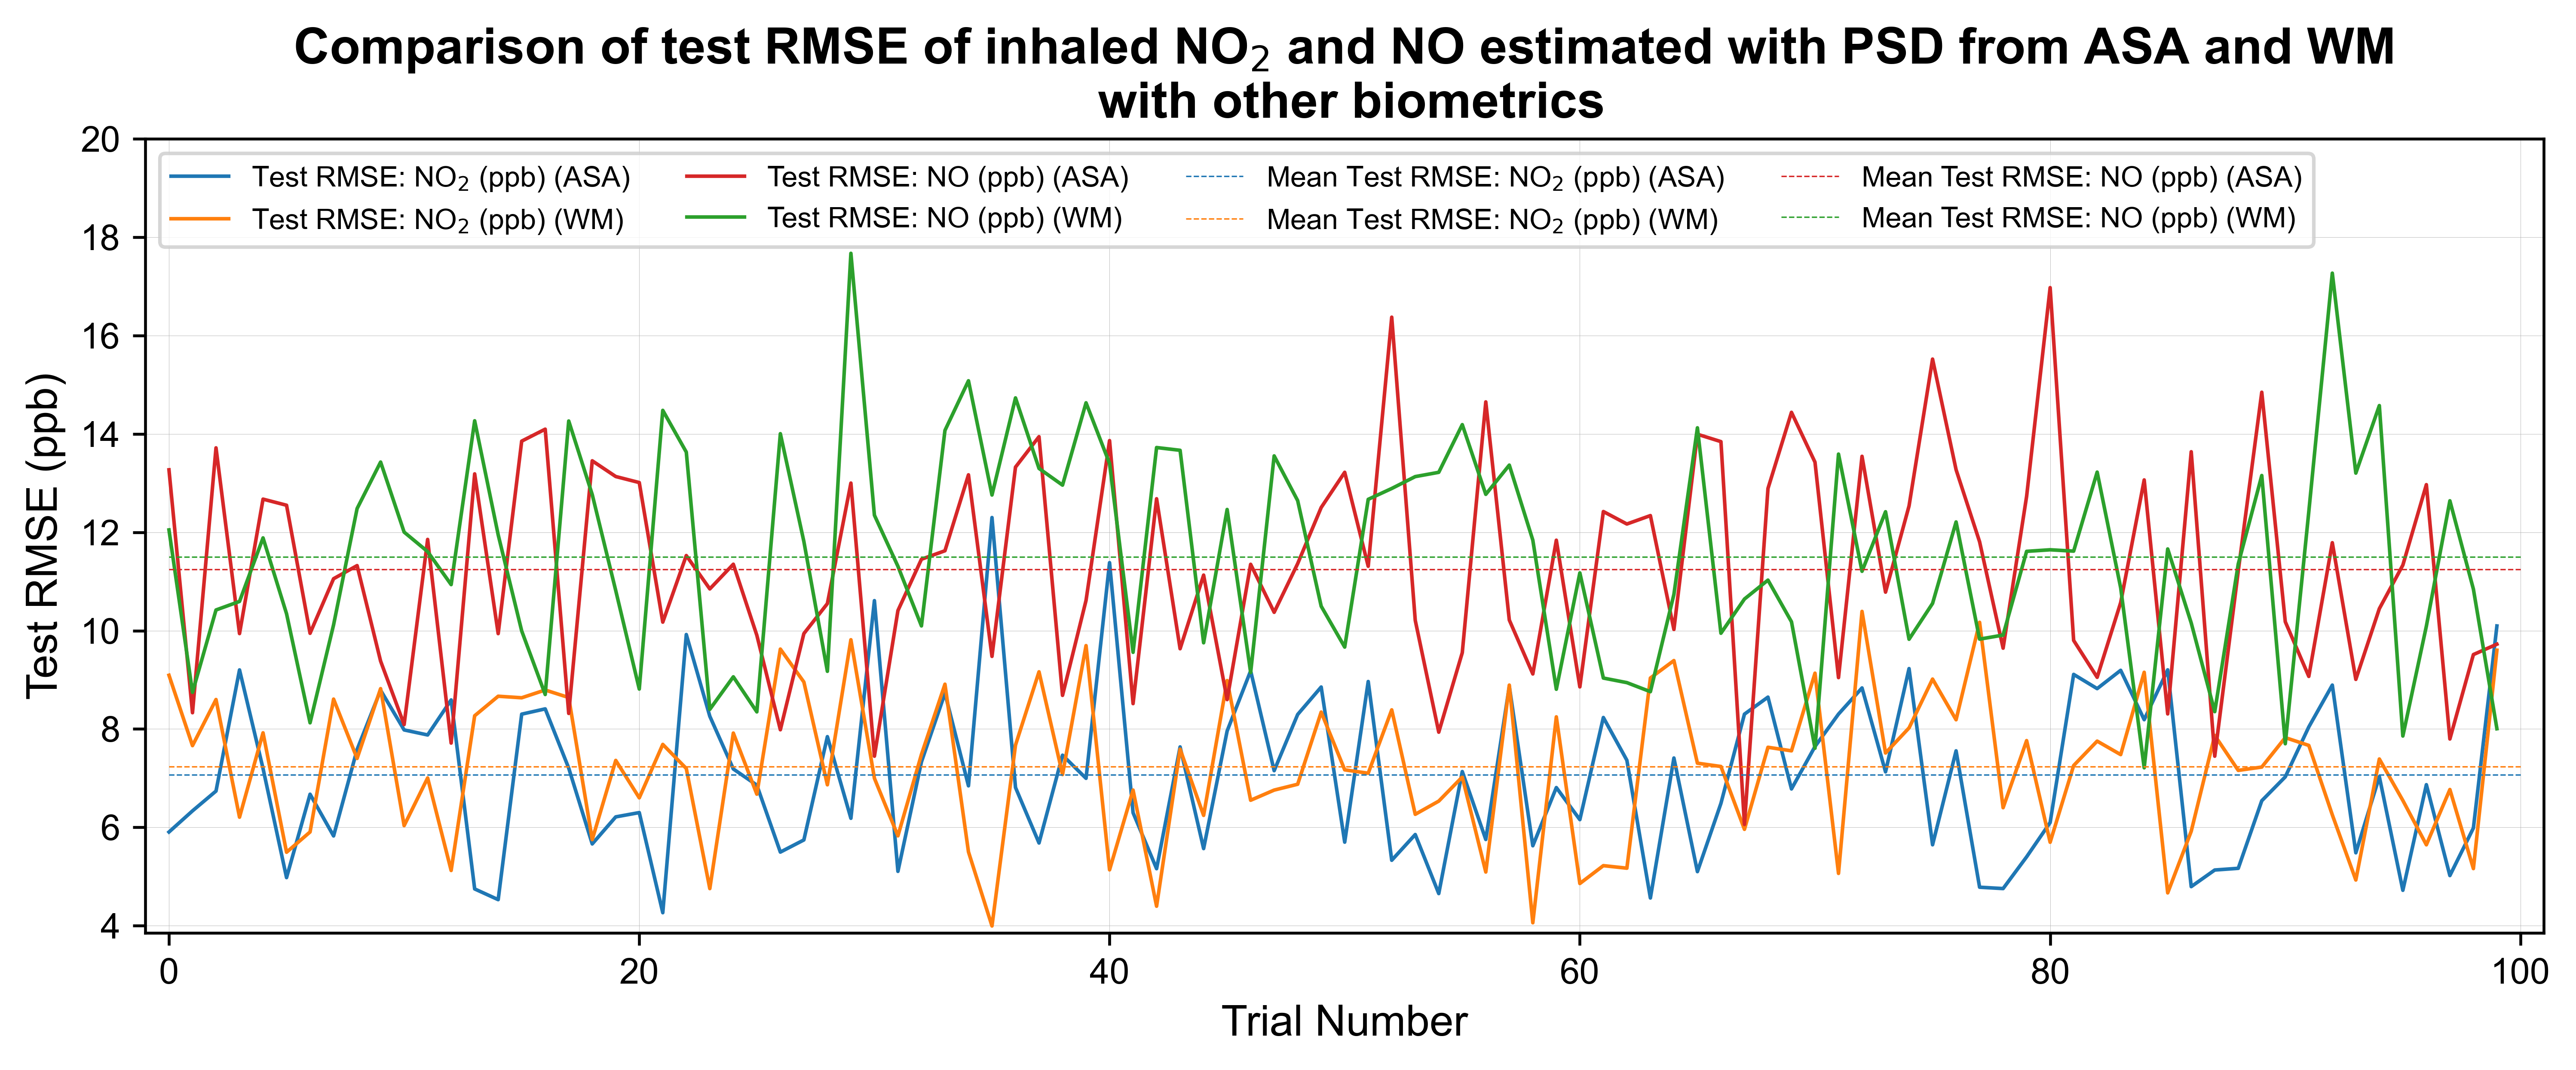

In [8]:
## Plot test RMSE of NO2 and NO from ASA and WM

fig, ax = plt.subplots(figsize=(12,4))

ax.plot(df['Test RMSE: NO$_2$ (ppb) (ASA)'],label='Test RMSE: NO$_2$ (ppb) (ASA)',linewidth=1,color='tab:blue')
ax.plot(df['Test RMSE: NO$_2$ (ppb) (WM)'],label='Test RMSE: NO$_2$ (ppb) (WM)',linewidth=1,color='tab:orange')

ax.plot(df['Test RMSE: NO (ppb) (ASA)'],label='Test RMSE: NO (ppb) (ASA)',linewidth=1,color='tab:red')
ax.plot(df['Test RMSE: NO (ppb) (WM)'],label='Test RMSE: NO (ppb) (WM)',linewidth=1,color='tab:green')

ax.hlines(y=NO2_ASA_mean_rmse, color='tab:blue', linestyle='--', label='Mean Test RMSE: NO$_2$ (ppb) (ASA)',
                                                                            xmin=0, xmax=100, linewidth=0.4)
ax.hlines(y=NO2_WM_mean_rmse, color='tab:orange', linestyle='--', label='Mean Test RMSE: NO$_2$ (ppb) (WM)',
                                                                             xmin=0, xmax=100, linewidth=0.4)

ax.hlines(y=NO_ASA_mean_rmse, color='tab:red', linestyle='--', label='Mean Test RMSE: NO (ppb) (ASA)',
                                                                            xmin=0, xmax=100, linewidth=0.4)
ax.hlines(y=NO_WM_mean_rmse, color='tab:green', linestyle='--', label='Mean Test RMSE: NO (ppb) (WM)',
                                                                             xmin=0, xmax=100, linewidth=0.4)
ax.set_xlim([-1, 101])
ax.set_ylim([3.85, 20])
plt.xlabel('Trial Number', fontsize=12)
plt.ylabel('Test RMSE (ppb)',fontsize=12)
plt.title('Comparison of test RMSE of inhaled NO$_2$ and NO estimated with PSD from ASA and WM \n with other biometrics',
                                                       fontsize=14, fontweight='bold')
plt.legend(fontsize=8, ncol=4,loc=2)
plt.grid(axis='both',linewidth=0.1)
plt.show()

In [9]:
CO2_ASA_mean=df.loc[:, 'Test R$^2$: CO$_2$ (ASA)'].mean()
CO2_WM_mean=df.loc[:, 'Test R$^2$: CO$_2$ (WM)'].mean()

NO2_ASA_mean=df.loc[:, 'Test R$^2$: NO$_2$ (ASA)'].mean()
NO2_WM_mean=df.loc[:, 'Test R$^2$: NO$_2$ (WM)'].mean()

NO_ASA_mean=df.loc[:, 'Test R$^2$: NO (ASA)'].mean()
NO_WM_mean=df.loc[:, 'Test R$^2$: NO (WM) '].mean()

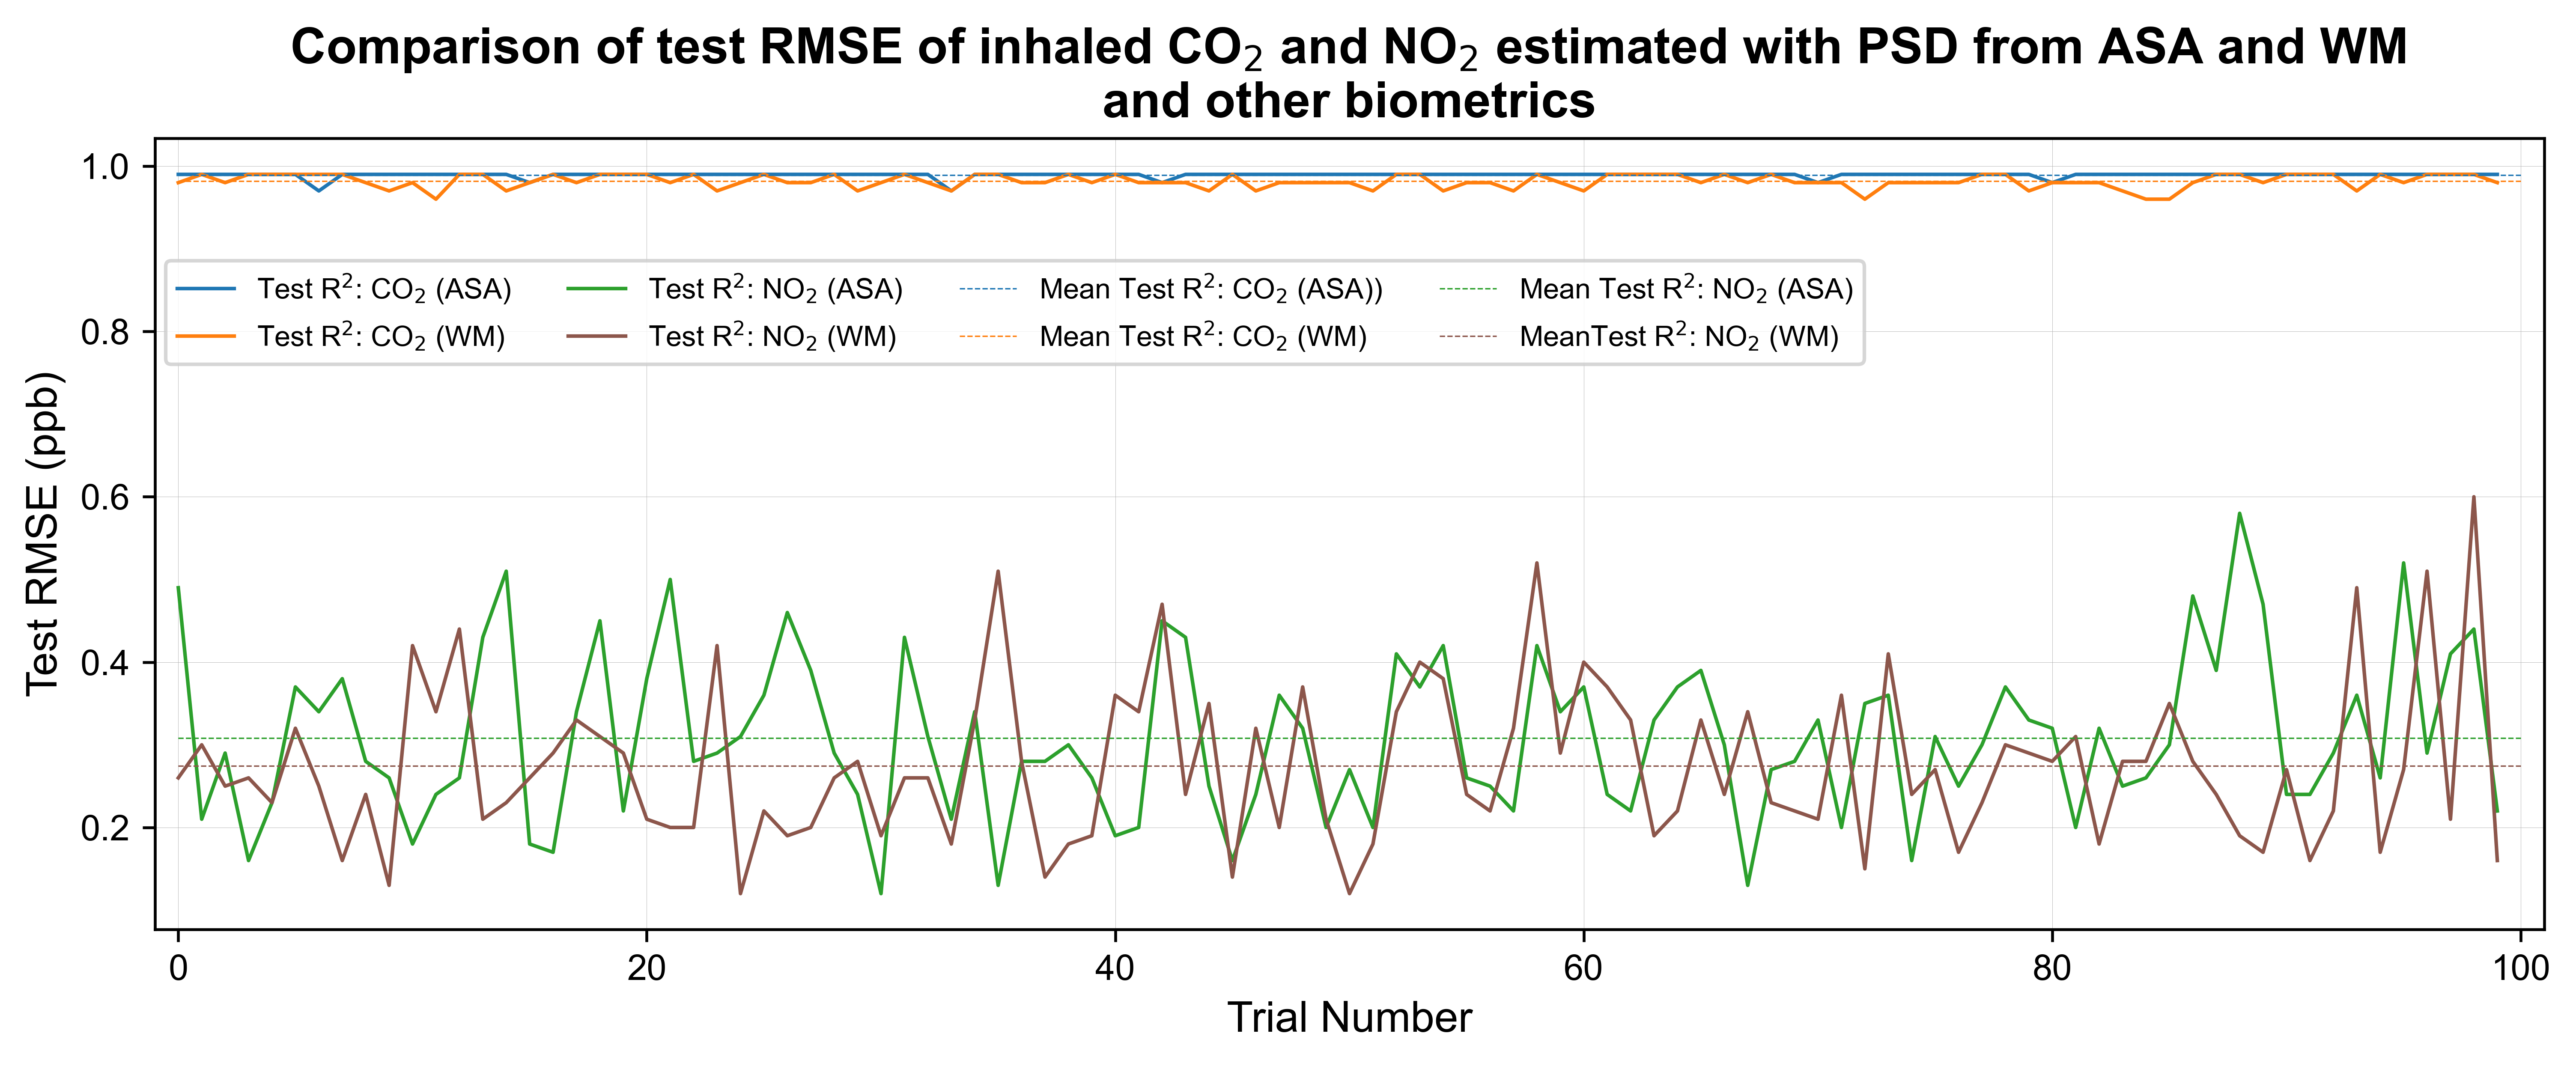

In [10]:
## Plot test RMSE of NO2 and NO from ASA and WM
 
fig, ax = plt.subplots(figsize=(12,4))

ax.plot(df['Test R$^2$: CO$_2$ (ASA)'],label='Test R$^2$: CO$_2$ (ASA)',linewidth=1,color='tab:blue')
ax.plot(df['Test R$^2$: CO$_2$ (WM)'],label='Test R$^2$: CO$_2$ (WM)',linewidth=1,color='tab:orange')

ax.plot(df['Test R$^2$: NO$_2$ (ASA)'],label='Test R$^2$: NO$_2$ (ASA)',linewidth=1,color='tab:green')
ax.plot(df['Test R$^2$: NO$_2$ (WM)'],label='Test R$^2$: NO$_2$ (WM)',linewidth=1,color='tab:brown')

ax.hlines(y=CO2_ASA_mean, color='tab:blue', linestyle='--', label='Mean Test R$^2$: CO$_2$ (ASA))',
                                                                            xmin=0, xmax=100, linewidth=0.4)
ax.hlines(y=CO2_WM_mean, color='tab:orange', linestyle='--', label='Mean Test R$^2$: CO$_2$ (WM)',
                                                                             xmin=0, xmax=100, linewidth=0.4)


ax.hlines(y=NO2_ASA_mean, color='tab:green', linestyle='--', label='Mean Test R$^2$: NO$_2$ (ASA)',
                                                                            xmin=0, xmax=100, linewidth=0.4)
ax.hlines(y=NO2_WM_mean, color='tab:brown', linestyle='--', label='MeanTest R$^2$: NO$_2$ (WM)',
                                                                             xmin=0, xmax=100, linewidth=0.4)
ax.set_xlim([-1, 101])
plt.xlabel('Trial Number', fontsize=12)
plt.ylabel('Test RMSE (ppb)',fontsize=12)
plt.title('Comparison of test RMSE of inhaled CO$_2$ and NO$_2$ estimated with PSD from ASA and WM \n and other biometrics ',
                                                          fontsize=14, fontweight='bold')
plt.legend(fontsize=8,ncol=4,loc='center',  bbox_to_anchor=(0.36,0.78))
plt.grid(axis='both',linewidth=0.1)
plt.show()

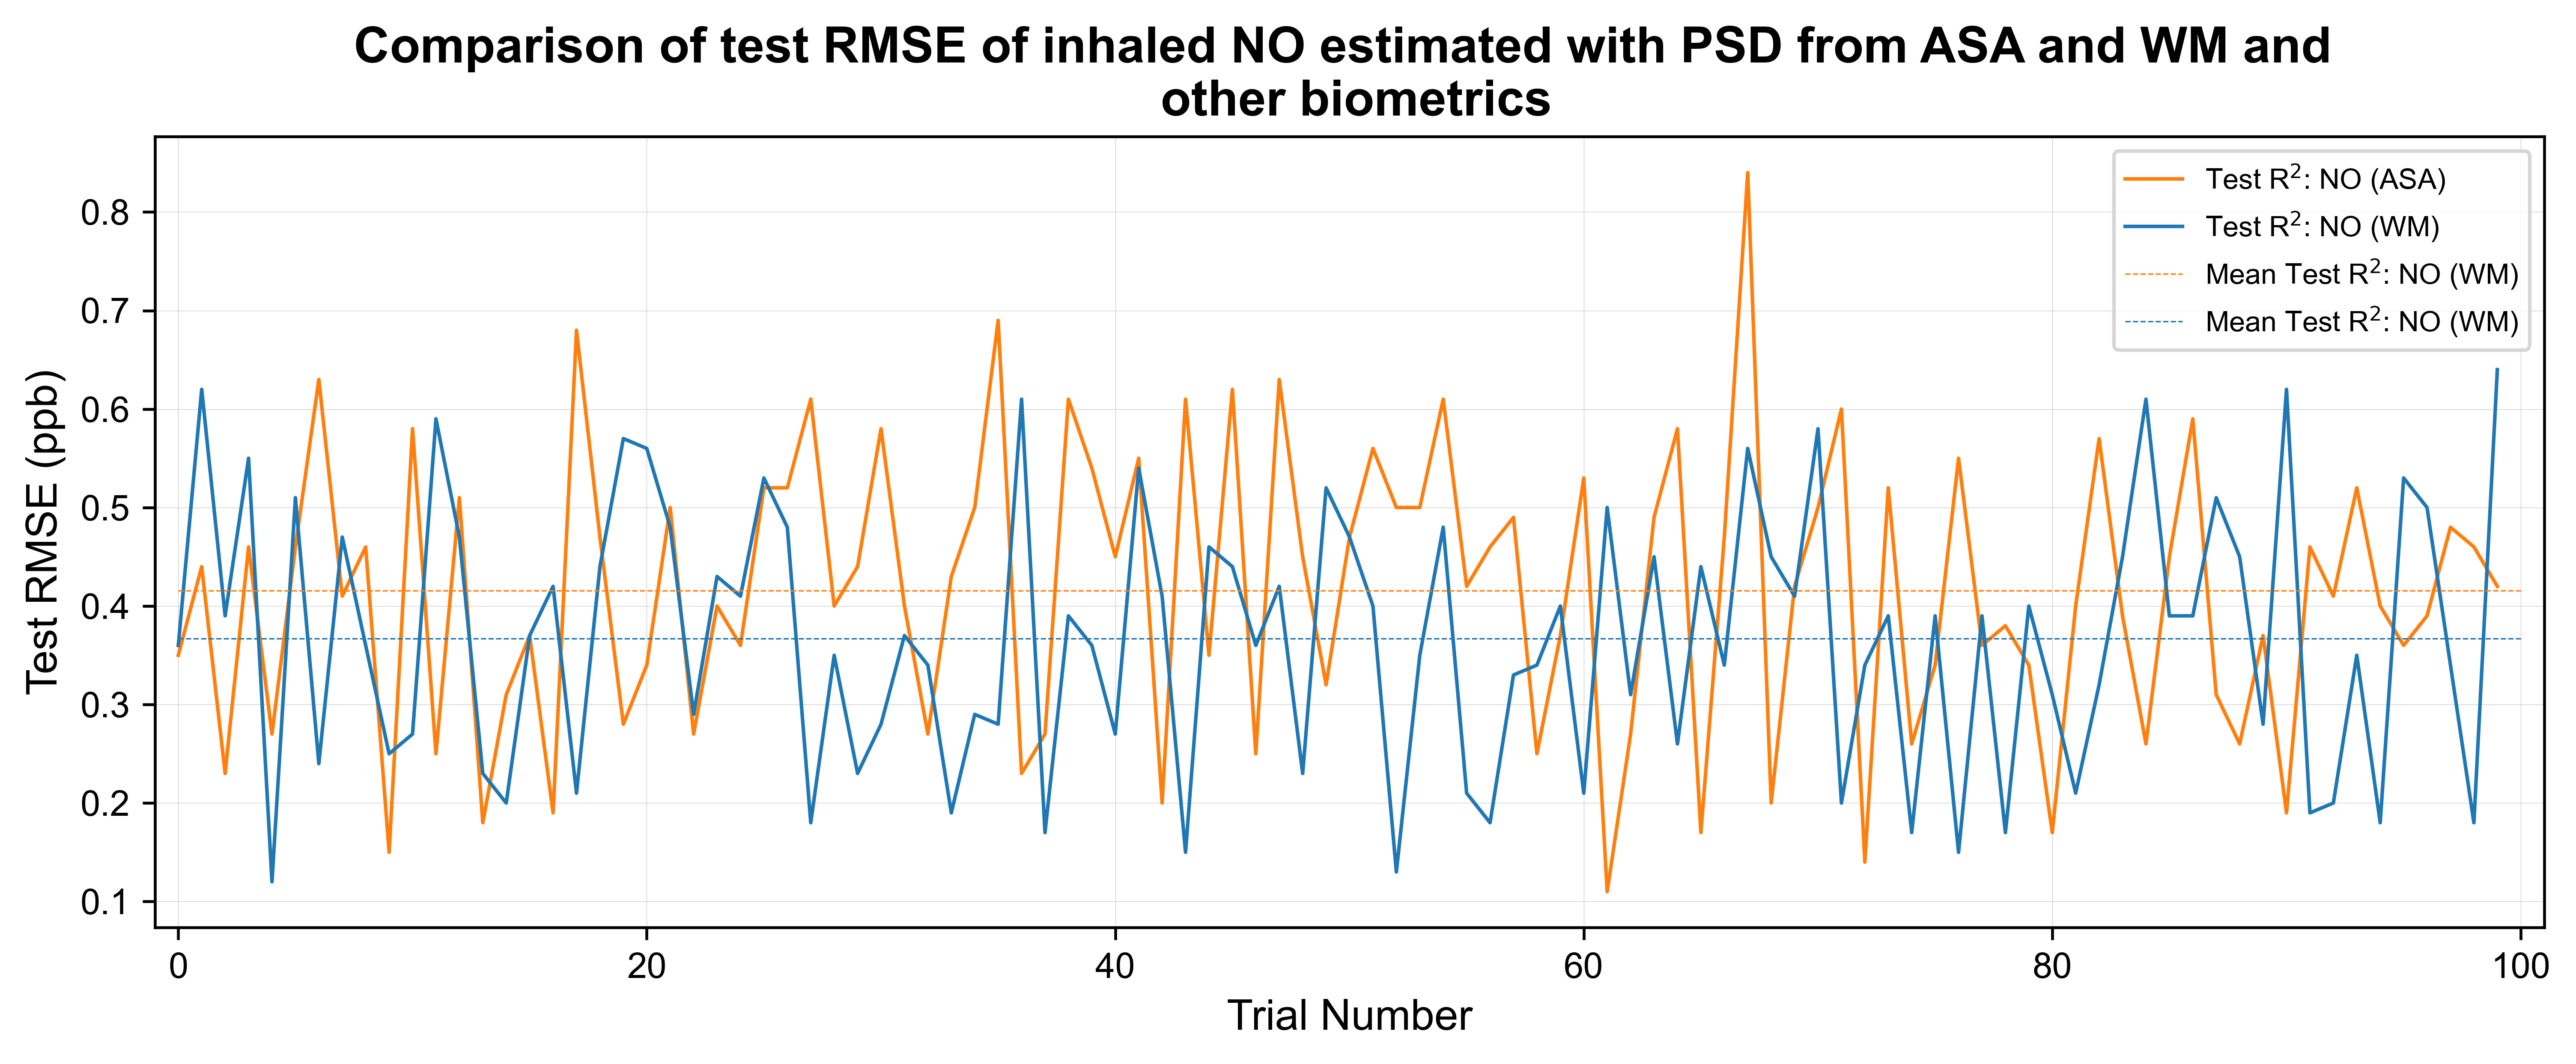

In [11]:
fig, ax = plt.subplots(figsize=(12,4))

ax.plot(df['Test R$^2$: NO (ASA)'],label='Test R$^2$: NO (ASA)',linewidth=1,color='tab:orange')
ax.plot(df['Test R$^2$: NO (WM) '],label='Test R$^2$: NO (WM)',linewidth=1,color='tab:blue')

ax.hlines(y=NO_ASA_mean, color='tab:orange', linestyle='--', label='Mean Test R$^2$: NO (WM)',
                                                                             xmin=0, xmax=100, linewidth=0.4)
ax.hlines(y=NO_WM_mean, color='tab:blue', linestyle='--', label='Mean Test R$^2$: NO (WM)',
                                                                             xmin=0, xmax=100, linewidth=0.4)
ax.set_xlim([-1, 101])
plt.xlabel('Trial Number', fontsize=12)
plt.ylabel('Test RMSE (ppb)',fontsize=12)
plt.title('Comparison of test RMSE of inhaled NO estimated with PSD from ASA and WM and \n other biometrics',
                                                                          fontsize=14, fontweight='bold')
plt.legend(fontsize=8)
plt.grid(axis='both',linewidth=0.1)
plt.show()